In [40]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

In [41]:
# Multimea starilor
states = ["Dificil", "Average", "Usor"]
n_states = len(states)

# Multimea elementelor observate - notele
observations = ["FB", "B", "S", "I"]
n_observations = len(observations)

In [42]:
start_probability = np.array([0.333, 0.333, 0.334])

transition_probability = np.array([
    [0, 0.5, 0.5],
    [0.5, 0.25, 0.25],
    [0.5, 0.25, 0.25]
])

observation_probability = np.array([
    [0.1, 0.2, 0.4, 0.3],
    [0.15, 0.25, 0.5, 0.1],
    [0.2, 0.3, 0.4, 0.1]
])

In [43]:
# Definirea modelului
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = observation_probability

Drawing graph


{('Dificil', 'Dificil'): Text(0.639892036145342, 0.5982118718512728, '0.0'),
 ('Dificil', 'Average'): Text(-0.10926813015542636, 0.4999998358958313, '0.5'),
 ('Dificil', 'Usor'): Text(0.42921412435293727, -0.27877857823104224, '0.5'),
 ('Average', 'Dificil'): Text(-0.1092724032039154, 0.5000001641041691, '0.5'),
 ('Average', 'Average'): Text(-0.8584325695046837, 0.7132966010706674, '0.25'),
 ('Average', 'Usor'): Text(-0.3199513223309668, -0.22122114655927383, '0.25'),
 ('Usor', 'Dificil'): Text(0.429218445151746, -0.27876378637865507, '0.5'),
 ('Usor', 'Average'): Text(-0.3199407138143754, -0.22123648883102875, '0.25'),
 ('Usor', 'Usor'): Text(0.21854053335934132, -0.8442457635390301, '0.25')}

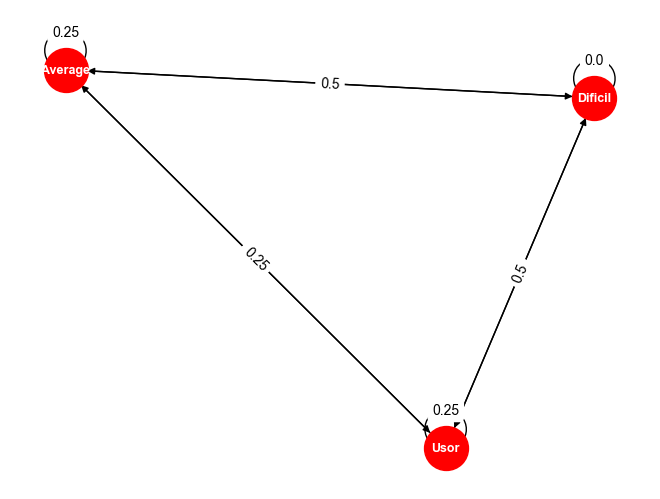

In [44]:
# Desenarea grafului
G = nx.DiGraph()
for state in states:
    G.add_node(state)
    
for i, from_state in enumerate(states):
    for j, to_state in enumerate(states):
        G.add_edge(from_state, to_state, weight=transition_probability[i,j]) 
    
print("Drawing graph")    
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000,node_color='red', font_size=9, font_color='white', font_weight='bold')
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

Most likely hidden states: ['Usor', 'Usor', 'Dificil', 'Usor', 'Dificil', 'Average', 'Dificil', 'Usor', 'Dificil', 'Usor', 'Dificil', 'Average']


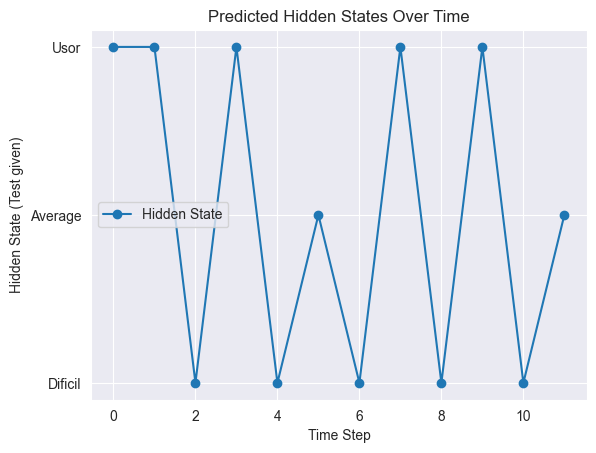

In [45]:
observation_sequence = np.array([0,0,2,1,1,2,1,1,3,1,1,2]).reshape(-1,1)

hidden_states = model.predict(observation_sequence)

print("Most likely hidden states:", [states[state] for state in hidden_states])

# Plot the results for visualization
sns.set_style("darkgrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel("Time Step")
plt.ylabel("Hidden State (Test given)")
plt.yticks(ticks=range(n_states), labels=states)
plt.legend()
plt.title("Predicted Hidden States Over Time")
plt.show()